In [1]:
import joblib
import pickle
import pandas as pd
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
file_path = 'results.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep='|')
df['dealDate'] = pd.to_datetime(df['dealDate'])
df

,dealDate,interestRate,gu,dong,exclusiveArea,floor,buildYear,dealAmount,apartmentName,jibunAddress,prediction,difference,reliable
0,2024-10-31,3.25,도봉구,도봉동,40.020,1,1996,26000,서원,도봉구 도봉동 641,27683.255208,0.064741,True
1,2024-10-31,3.25,마포구,신수동,59.376,7,2019,161000,신촌숲아이파크,마포구 신수동 462,140887.276571,0.124924,True
2,2024-10-31,3.25,성동구,옥수동,142.260,8,1986,155000,극동,성동구 옥수동 428,164345.976596,0.060297,True
3,2024-10-31,3.25,영등포구,당산동5가,59.850,11,1999,109500,당산효성1차,영등포구 당산동5가 12,105078.894010,0.040375,True
4,2024-10-31,3.25,영등포구,문래동3가,58.960,7,1988,85000,문래공원한신,영등포구 문래동3가 77-2,83520.079986,0.017411,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288183,2006-01-01,3.75,노원구,상계동,59.200,12,1988,13500,상계주공6(고층),노원구 상계동 720,14308.963513,0.059923,True
1288184,2006-01-01,3.75,관악구,봉천동,59.760,3,2000,16900,봉천우성,관악구 봉천동 1706,21319.449685,0.261506,True
1288185,2006-01-01,3.75,양천구,신정동,53.820,7,1987,33300,목동신시가지9,양천구 신정동 312,31844.791226,0.043700,True
1288186,2006-01-01,3.75,서초구,잠원동,79.420,4,1978,56700,신반포2,서초구 잠원동 73,64218.085470,0.132594,True


In [4]:
apartmentName = "상계주공1(고층)"
df_tmp = df[df['apartmentName']==apartmentName]

print(sorted(df_tmp['exclusiveArea'].unique()))

[32.39, 41.3, 49.94, 58.01, 59.2, 59.28, 59.39, 60.5, 68.86]


In [5]:
exclusiveArea = 84.43
df_target = df_tmp[(df_tmp['exclusiveArea'] >= 58) & (df_tmp['exclusiveArea'] <= 61)]

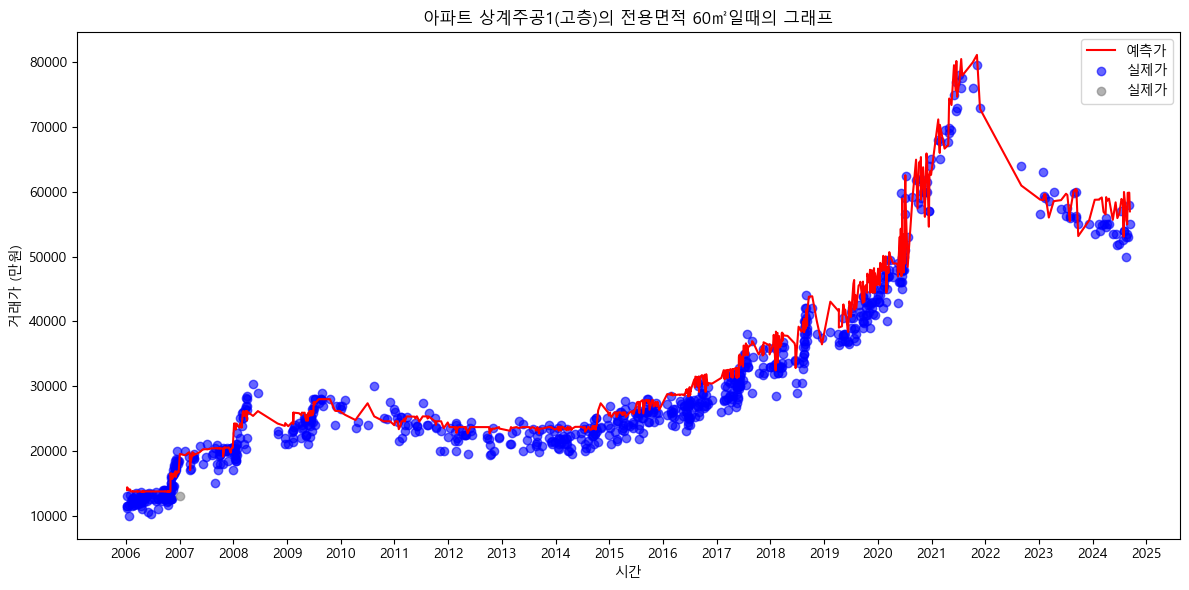

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'NanumGothic' 등으로도 변경 가능
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.figure(figsize=(12, 6))

plt.plot(df_target['dealDate'], df_target['prediction'], color='red', label='예측가', alpha=1)
plt.scatter(df_target.loc[df_target['reliable'] == True, 'dealDate'],
            df_target.loc[df_target['reliable'] == True, 'dealAmount'],
            color='blue', label='실제가', alpha=0.6)
plt.scatter(df_target.loc[df_target['reliable'] == False, 'dealDate'],
            df_target.loc[df_target['reliable'] == False, 'dealAmount'],
            color='grey', label='실제가', alpha=0.6)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1년 간격으로 주요 틱 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 년도만 표시


plt.title(f'아파트 {apartmentName}의 전용면적 {60}㎡일때의 그래프')
plt.xlabel('시간')
plt.ylabel('거래가 (만원)')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
df_anomaly = df_target[df_target['reliable'] == False]
print(df_anomaly)

          dealDate  interestRate   gu dong  exclusiveArea  floor  buildYear  \
1176646 2007-01-03           4.5  노원구  상계동          58.01     15       1988   

         dealAmount apartmentName jibunAddress    prediction  difference  \
1176646       13000     상계주공1(고층)  노원구 상계동 765  19513.962882    0.501074   

         reliable  
1176646     False  
